In [7]:
'''All packages'''

import geopandas as gpd
import pandas as pd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt, mpld3
from mpld3 import fig_to_html, plugins

%matplotlib inline


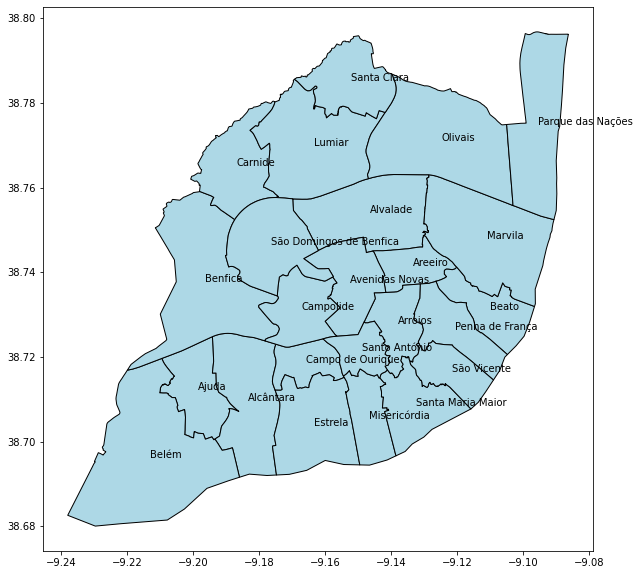

In [2]:
'''Simple Plot of Map Without Filter and Choropleth'''

plt.rcParams['figure.figsize'] = (20, 10) #setting parameters
df_places = gpd.read_file('./Lisboa.geojson') #read file Lisboa.geojson


fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax,color="lightblue", edgecolor='black') #plot of map Lisboa.geojson

#for to put the name of the regions
for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy
    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()


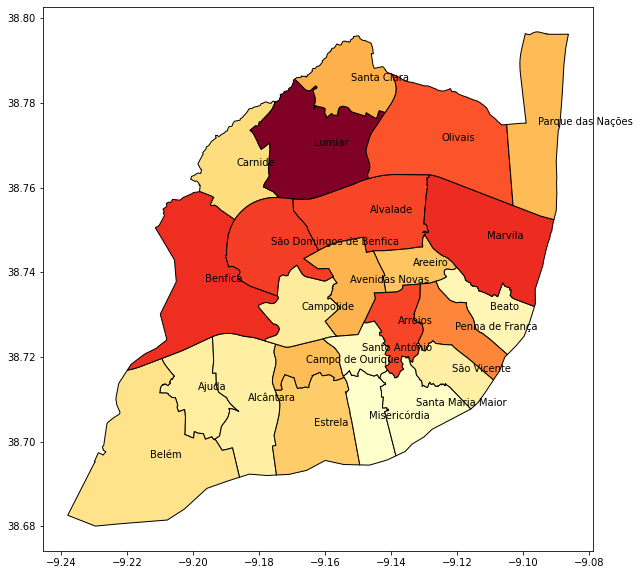

In [3]:
'''Plot of Map with Choropleth of Population'''


population = []

#appending all elements of geojson to convert to integer 
for idx, row in df_places.iterrows():
    population.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
#converting to integers
for a in range(0, len(population)):
    population[a] = int(population[a])


df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = population
    
fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax, column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black",
                      cmap='YlOrRd')


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [4]:
'''Filter and Plot of Map with the Points later'''

directory = "./archives"
ext = ".geojson"
lista=[]
listadirs=[]
dic={}
filtrolist=[]




In [5]:
def leitura(filtro):
    i=0
    sum=0
    global lista, listadirs, dic, filtrolist
    listafiles=[]


    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1 and len(file) == len(filtro):
                        print(filtro)
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))
                        

    
    for k, v in dic.items():
        for value in v:
            if value.find(filtro) != -1:
                filtrolist.append(k)

def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)
            
leitura("aaaaaaaaaaaaa")   
pprint()

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

In [6]:
b=True
c=0


while b:
    
    a = input("Insira os diretorios: ")
    leitura(a)
    if a == "sair":
        b=False




fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

df_places.plot(ax=ax, color = "white", edgecolor="black")

print(filtrolist)

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

Museus, bibliotecas e arquivos.geojson


NameError: name 'gpd' is not defined

['culturalazer', 'transportes']


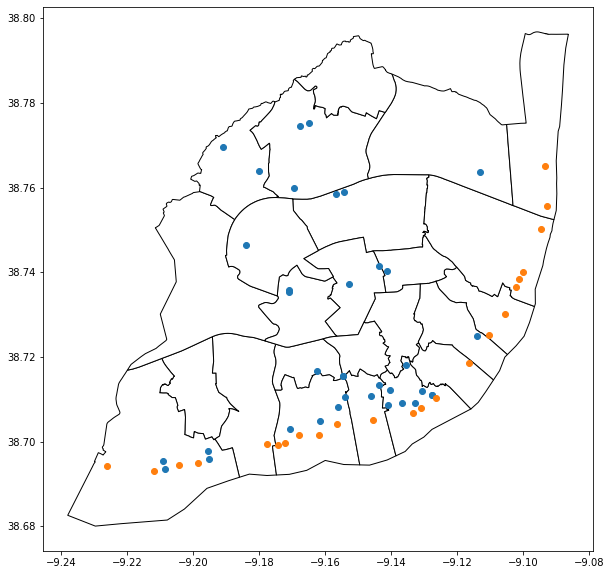

In [7]:
fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

axis = df_places.plot(ax=ax, color="white", edgecolor="black")

print(filtrolist)



In [1]:
print(len(lista))

NameError: name 'lista' is not defined

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
36
23
[0, 0, 2, 1, 0, 2, 0, 4, 0, 3, 2, 2, 4, 3, 0, 2, 1, 0, 1, 0, 8, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 5, 0, 4, 1, 0, 2, 0, 0, 3, 0, 0, 1]


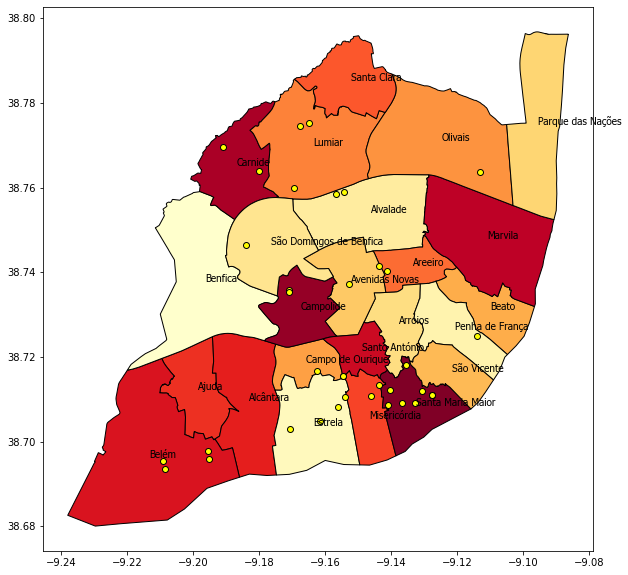

In [14]:
'''Choropleth with Points of Filter'''

listafilter = []
listafilted= []
count = []
number = []


#organizing the names
df_places.NOME=sorted(df_places.NOME)



for b in range(0, len(lista)):
    for idx, row in lista[b].iterrows():
        listafilter.append(row.geometry)
        print(listafilter)
        
    for ele in listafilter:
        if ele != None:
            listafilted.append(ele)
            
    for a in listafilted:
        for idx1, row1 in df_places.iterrows():
                if a.intersects(row1.geometry) == True:
                    count.append(row1.NOME)


    for a in df_places.NOME:
        numb = count.count(a)
        number.append(numb) 
                
    for a in range(0, len(number)):
        number[a] = int(number[a])

    filtrolist[b] = number
    print(type(number))
    
    listafilter = []
    listafilted= []
    count = []
    number = []

wtf = 0 
for a in filtrolist[0]:
    wtf += a

print(wtf)
wtf=0

for a in filtrolist[1]:
    wtf += a
print(wtf)
print(filtrolist[0])
print(filtrolist[1])




df_places.GlobalID=number  

fig, ax = plt.subplots()
lista[0].plot(ax=ax, edgecolor = "black", color ="yellow", zorder =2)
axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.GlobalID, cmap= "YlOrRd", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()
                

0
1
2
3
4
5
6
7
8
9
10
[0.0, 0.2173913043478261, 0.33333333333333337, 0.16666666666666669, 0.0, 0.33333333333333337, 0.4347826086956522, 1.5362318840579714, 0.0, 0.49999999999999994, 0.33333333333333337, 0.33333333333333337, 1.7536231884057976, 0.49999999999999994, 0.8695652173913044, 0.5507246376811594, 0.16666666666666669, 0.4347826086956522, 0.16666666666666669, 0.0, 1.985507246376812, 0.0, 0.16666666666666669, 0.2173913043478261]


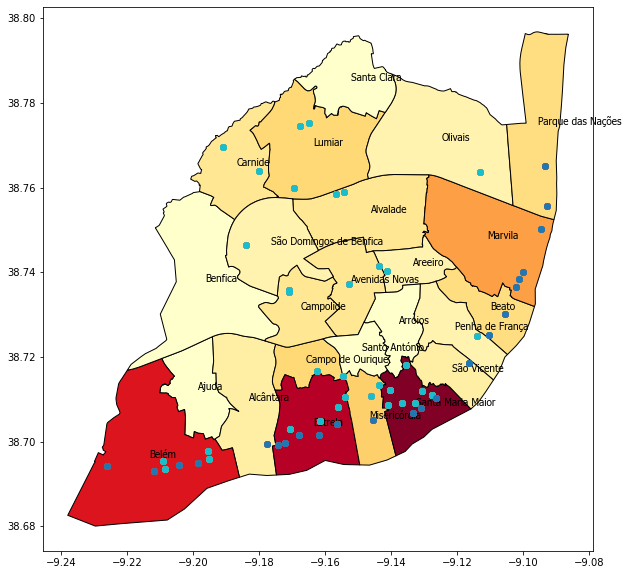

In [16]:
sum=0
df_places.NOME=sorted(df_places.NOME)


for a in range(0, len(filtrolist)):
    print(a)
    for b in range(0, len(filtrolist[a])):
        sum+=filtrolist[a][b]
    for b in range(0, len(filtrolist[a])): 
        filtrolist[a][b] = filtrolist[a][b] / sum

    sum=0 



choropleth=[]
for a in range(0, len(filtrolist[0])):
    for b in range(0, len(filtrolist)):
        sum += filtrolist[b][a]
    
    #print(sum)
    choropleth.append(sum)
    sum=0

print(choropleth)  

df_places["Censos 2021 População Lisboa_field_4"] = choropleth


fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

axis = df_places.plot(ax=ax, edgecolor = "black", column = "Censos 2021 População Lisboa_field_4", cmap= "YlOrRd", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  

#print(filtrolist)
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

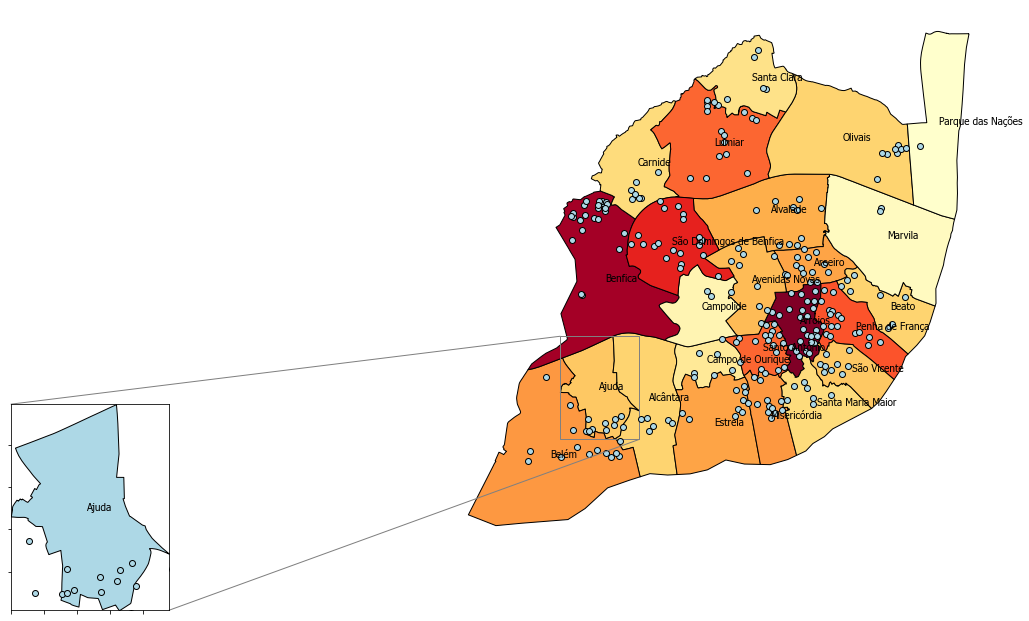

In [18]:
#LIXO (por enquanto)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

region = "Ajuda"
benfica = df_places[df_places.NOME == region]
fig,ax=plt.subplots(1,1)

lista[0].plot(ax=ax, edgecolor = "black", color ="lightblue", zorder =3)
axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.GlobalID, cmap= "YlOrRd", zorder=1)



axins = zoomed_inset_axes(axis, 2, loc='lower left', bbox_to_anchor=(0,0), borderpad=3)

minx,miny,maxx,maxy = benfica.total_bounds
axins.set_xlim(minx, maxx)
axins.set_ylim(miny, maxy)

minx,miny,maxx,maxy =  lista[0].total_bounds

lista[0].plot(ax=axins, edgecolor = "black", color ="lightblue", zorder =3)
bf = benfica.plot(ax=axins, edgecolor='black', color = 'lightblue', zorder = 2)


mark_inset(ax, axins,  loc1=2, loc2=4, fc="none", ec="0.5")
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)


for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  
    
for idx, row in benfica.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    bf.annotate(row["NOME"], xy=(x, y), xytext=(x, y), font ="Tahoma")    
    

fig.savefig("img.png")
ax.set_axis_off()

In [9]:
plot = df_places.explore(column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      cmap='YlOrRd')

                      
file="pastel.html"



plot.save(file)